In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score

In [98]:
data_set = pd.read_csv('creditcard.csv')
data_set.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [99]:
data_set = data_set.sample(frac = 1)
data_set.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28927,35239.0,-1.019388,-0.082739,3.150332,1.577126,0.034090,-0.123065,-0.412406,0.208186,0.306165,...,0.046453,0.279938,-0.080330,0.578808,0.013802,-0.239320,-0.038316,-0.115113,1.00,0
193043,129966.0,-0.293642,0.797023,-1.097470,1.098508,0.502156,-0.265314,1.045972,0.146423,-0.887235,...,0.182366,0.546327,-0.250499,-0.434831,0.187294,-0.387129,-0.141587,-0.254485,114.10,0
131179,79515.0,-1.189001,0.368081,1.515332,-1.081610,0.237509,-0.466054,0.220490,0.118376,0.367465,...,-0.063562,0.038567,-0.408290,0.081522,0.080106,0.960365,0.038735,0.111357,10.00,0
206575,136264.0,1.996346,0.593364,-1.699163,3.375927,1.492158,0.787656,0.443422,0.028224,-1.298067,...,-0.048173,-0.128868,-0.011756,-0.379431,0.343783,0.034185,-0.074403,-0.074490,7.58,0
129953,79249.0,-1.156020,0.021750,-0.065769,-0.660871,3.118938,3.482591,0.478832,0.576391,-0.018350,...,-0.158757,-0.255402,-0.352594,1.018544,0.267554,-0.552179,-0.240806,-0.031263,84.48,0


In [100]:
x = data_set.iloc[:, data_set.columns != 'Class'].drop(columns=['Time'])
y = data_set.iloc[:, data_set.columns == 'Class']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [102]:
model = LogisticRegression()
model.fit(x_train, y_train)

/Users/sarvinbaghi/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [103]:
y_pred_train = model.predict(x_train)
accuracy_train  = accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}%".format(accuracy_train  * 100))

Accuracy: 99.92%


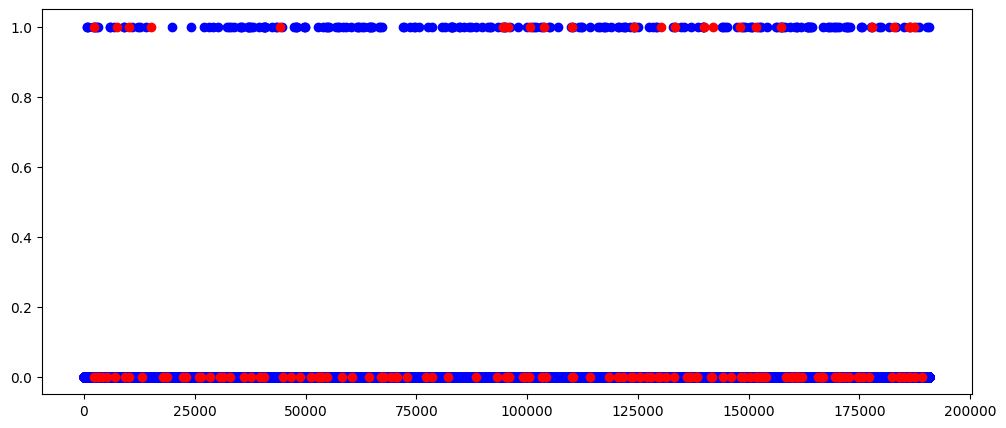

In [105]:
stop = len(y_pred_train )
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
y_difference = []
x_difference = []
x_same = []
y_same = []
for i in range(stop):
    if y_pred_train [i] == y_train.to_numpy()[i]:
        x_same.append(i)
        y_same.append(y_pred_train[i])
    else:
        x_difference.append(i)
        y_difference.append(y_pred_train[i])
        
xpoints = np.asanyarray(range(stop))
axs.plot(x_same, y_same, 'o', color="blue")
axs.plot(x_difference, y_difference, 'o', color="red")

In [106]:
y_pred_test = model.predict(x_test)
accuracy_test  = accuracy_score(y_test, y_pred_test )
print("Accuracy: {:.2f}%".format(accuracy_test  * 100))

Accuracy: 99.92%


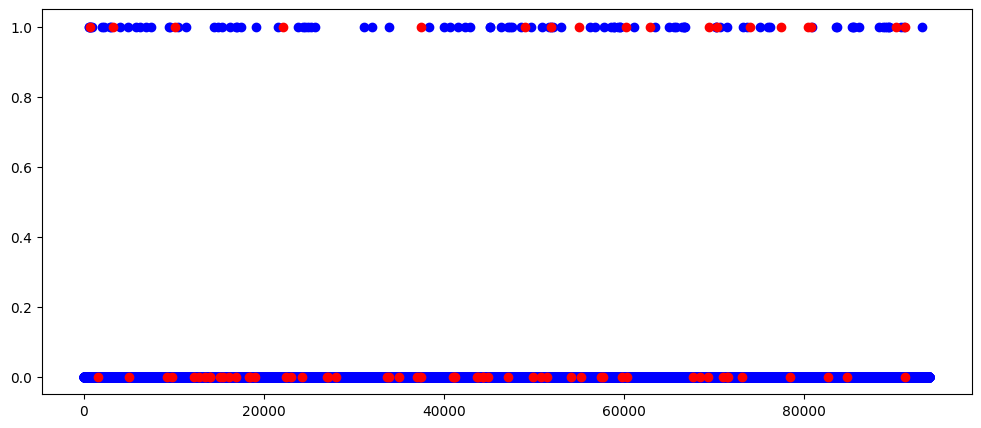

In [107]:
stop = len(y_pred_test )
fig, axs = plt.subplots(1, 1, figsize=(12, 5))
y_difference = []
x_difference = []
x_same = []
y_same = []
for i in range(stop):
    if y_pred_test [i] == y_test.to_numpy()[i]:
        x_same.append(i)
        y_same.append(y_pred_test[i])
    else:
        x_difference.append(i)
        y_difference.append(y_pred_test[i])
        
xpoints = np.asanyarray(range(stop))
axs.plot(x_same, y_same, 'o', color="blue")
axs.plot(x_difference, y_difference, 'o', color="red")